# Ali Abdullah Ahmad
## CWID - 20031246
## HW03_KNN

In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import numpy as np

### Importing Dataset

In [287]:
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS513_Knowledge_Discovery&Data_Mining/HW/breast-cancer-wisconsin.csv')
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Cleaning

In [288]:
df.drop(columns='Sample',axis=1,inplace=True)
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# from previous assignment we know that column F6 has '?'  as a missing value which could probably be 6 as all numbers 1-10 are present except for 6, but the asignment tells us to replace the '?' with mean

In [289]:
df.replace('?', np.nan , inplace=True )

In [290]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6       16
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [291]:
print(df['F6'].dtype)

object


In [292]:
# Convert all columns in the dataframe to numeric data types
df = df.apply(pd.to_numeric)

In [293]:
print(df.dtypes)

F1         int64
F2         int64
F3         int64
F4         int64
F5         int64
F6       float64
F7         int64
F8         int64
F9         int64
Class      int64
dtype: object


In [294]:
#Replacing missing values with mean and changing its data type to int
df['F6'].fillna(df['F6'].mean(), inplace=True)
print(df.isnull().sum())
print(df['F6'].dtype)
df['F6'] = df['F6'].astype(int)
print(df['F6'].dtype)

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
Class    0
dtype: int64
float64
int32


C:\Users\abdul\AppData\Local\Temp\ipykernel_1960\1535092527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean(), inplace=True)


### train test split

In [295]:
#Train test split with 30% Test and 70% Training data
X = df.drop(columns='Class',axis=1)
y = df['Class']
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size=0.3,random_state=42)

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

### data normalisation

In [297]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### implementing KNN algorithm with evaluation for each weight and heatmap for confusion matrix

Accuracy of model with k = 3 : 0.9592
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       328
           4       0.92      0.96      0.94       162

    accuracy                           0.96       490
   macro avg       0.95      0.96      0.95       490
weighted avg       0.96      0.96      0.96       490

[[314  14]
 [  6 156]]
-----------------


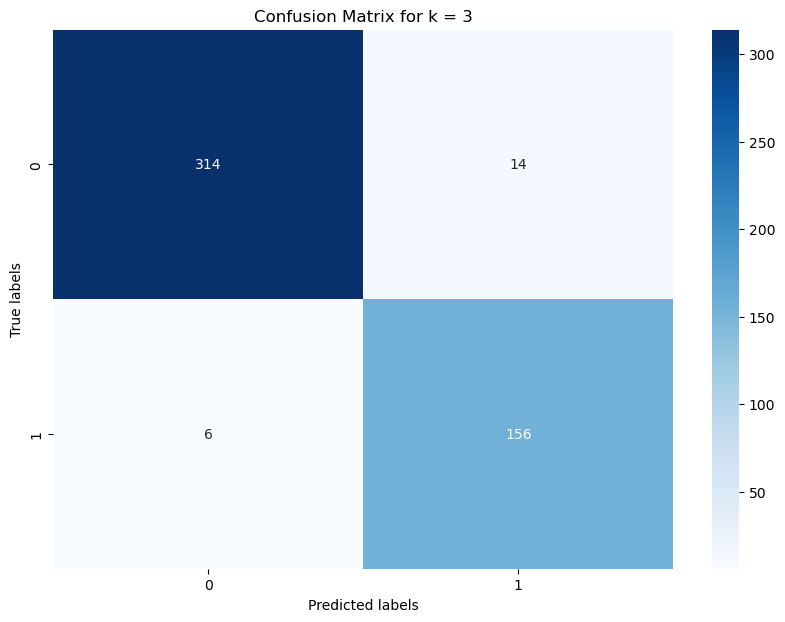

Accuracy of model with k = 5 : 0.9653
              precision    recall  f1-score   support

           2       0.98      0.97      0.97       325
           4       0.94      0.96      0.95       165

    accuracy                           0.97       490
   macro avg       0.96      0.96      0.96       490
weighted avg       0.97      0.97      0.97       490

[[314  11]
 [  6 159]]
-----------------


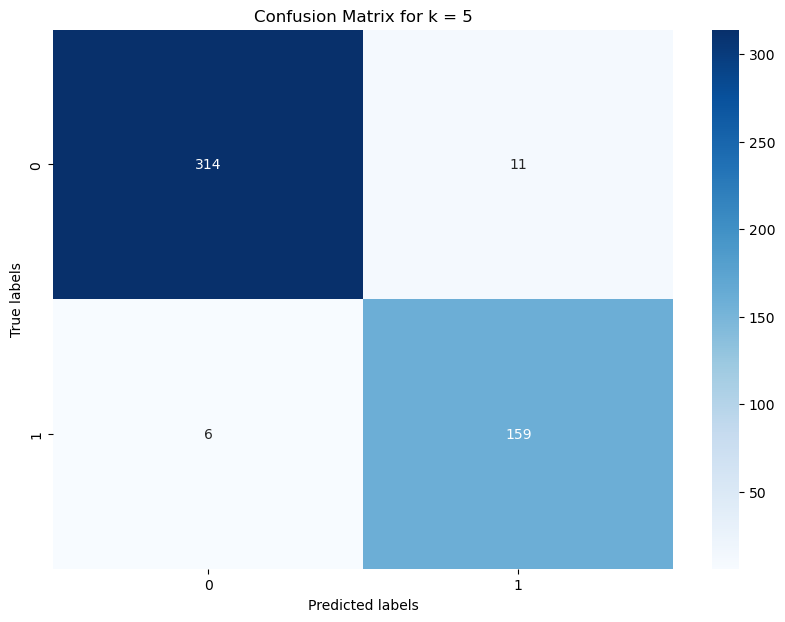

Accuracy of model with k = 10 : 0.9571
              precision    recall  f1-score   support

           2       0.98      0.95      0.97       331
           4       0.91      0.97      0.94       159

    accuracy                           0.96       490
   macro avg       0.95      0.96      0.95       490
weighted avg       0.96      0.96      0.96       490

[[315  16]
 [  5 154]]
-----------------


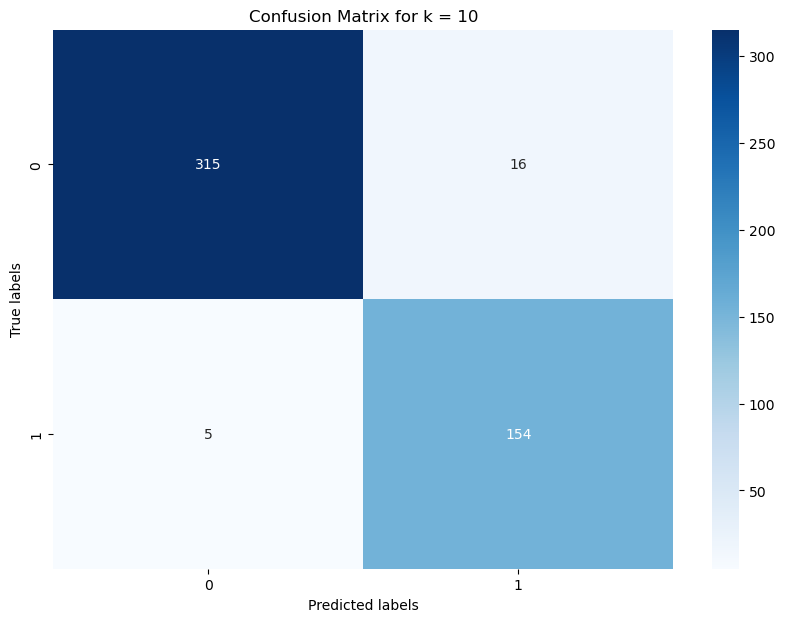

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

#k values for knn classifier
k_values = [3, 5, 10]


#Training and Evaluation KNN with 3 values as specified in assignment
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of model with k = {k} : {accuracy:.4f}')
    print(classification_report(y_pred, y_test))
    cm = confusion_matrix(y_pred, y_test)
    print(cm)
    print('-----------------')
    
    # Plot heatmap for each value of k
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for k = {k}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()